In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chicago_crimes_2001_04 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False, index_col=0)
print('crimes_2001_04 shape',chicago_crimes_2001_04.shape)
chicago_crimes_2005_07 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, index_col=0)
print('crimes_2005_07 shape', chicago_crimes_2005_07.shape)
chicago_crimes_2008_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, index_col=0)
print('crimes_2008_11 shape', chicago_crimes_2008_11.shape)
chicago_crimes_2012_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, index_col=0)
print('crimes_2012_17 shape', chicago_crimes_2012_17.shape)

Skipping line 1513591: expected 23 fields, saw 24

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


('crimes_2001_04 shape', (1923515, 22))


Skipping line 533719: expected 23 fields, saw 24



('crimes_2005_07 shape', (1872343, 22))


Skipping line 1149094: expected 23 fields, saw 41



('crimes_2008_11 shape', (2688710, 22))
('crimes_2012_17 shape', (1456714, 22))


In [3]:
crimes_2001_17 = pd.concat([chicago_crimes_2001_04, chicago_crimes_2005_07, chicago_crimes_2008_11, chicago_crimes_2012_17])

In [4]:
crimes_2001_17.shape

(7941282, 22)

In [5]:
crimes_2001_17.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [6]:
print(crimes_2001_17.head(10))

           ID Case Number                    Date                    Block  \
879   4786321    HM399414  01/01/2004 12:01:00 AM        082XX S COLES AVE   
2544  4676906    HM278933  03/01/2003 12:00:00 AM          004XX W 42ND PL   
2919  4789749    HM402220  06/20/2004 11:00:00 AM      025XX N KIMBALL AVE   
2927  4789765    HM402058  12/30/2004 08:00:00 PM       045XX W MONTANA ST   
3302  4677901    HM275615  05/01/2003 01:00:00 AM       111XX S NORMAL AVE   
3633  4838048    HM440266  08/01/2004 12:01:00 AM      012XX S HARDING AVE   
3756  4791194    HM403711  01/01/2001 11:00:00 AM  114XX S ST LAWRENCE AVE   
4502  4679521    HM216293  03/15/2003 12:00:00 AM       090XX S RACINE AVE   
4564  4792195    HM405396  09/16/2004 10:00:00 AM       003XX W HUBBARD ST   
4904  4680124    HM282389  01/01/2003 12:00:00 AM    009XX S SPAULDING AVE   

      IUCR                Primary Type                     Description  \
879   0840                       THEFT   FINANCIAL ID THEFT: OVER $

In [7]:
crimes_2001_17.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate             object
Year                    float64
Updated On               object
Latitude                 object
Longitude               float64
Location                 object
dtype: object

In [8]:
crimes_2001_17.isnull().sum()

ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [9]:
primary_crime_type_counts = crimes_2001_17['Primary Type'].value_counts()
primary_crime_type_counts = primary_crime_type_counts.to_dict()
primary_crime_type_counts = sorted(primary_crime_type_counts.items(), key=lambda x:x[1], reverse=True)
primary_crime_type_counts

[('THEFT', 1640506),
 ('BATTERY', 1442716),
 ('CRIMINAL DAMAGE', 923000),
 ('NARCOTICS', 885431),
 ('OTHER OFFENSE', 491922),
 ('ASSAULT', 481661),
 ('BURGLARY', 470958),
 ('MOTOR VEHICLE THEFT', 370548),
 ('ROBBERY', 300453),
 ('DECEPTIVE PRACTICE', 280931),
 ('CRIMINAL TRESPASS', 229366),
 ('PROSTITUTION', 86401),
 ('WEAPONS VIOLATION', 77429),
 ('PUBLIC PEACE VIOLATION', 58548),
 ('OFFENSE INVOLVING CHILDREN', 51441),
 ('CRIM SEXUAL ASSAULT', 29868),
 ('SEX OFFENSE', 28707),
 ('GAMBLING', 18806),
 ('LIQUOR LAW VIOLATION', 17513),
 ('INTERFERENCE WITH PUBLIC OFFICER', 15710),
 ('ARSON', 13097),
 ('HOMICIDE', 9051),
 ('KIDNAPPING', 7756),
 ('INTIMIDATION', 4636),
 ('STALKING', 3734),
 ('OBSCENITY', 496),
 ('PUBLIC INDECENCY', 163),
 ('OTHER NARCOTIC VIOLATION', 144),
 ('NON-CRIMINAL', 97),
 ('CONCEALED CARRY LICENSE VIOLATION', 90),
 ('NON - CRIMINAL', 38),
 ('RITUALISM', 31),
 ('HUMAN TRAFFICKING', 28),
 ('NON-CRIMINAL (SUBJECT SPECIFIED)', 4),
 ('DOMESTIC VIOLENCE', 2)]

In [10]:
unzip_crime_data = zip(*primary_crime_type_counts)
print(unzip_crime_data[0])
print(unzip_crime_data[1])

('THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'STALKING', 'OBSCENITY', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL', 'RITUALISM', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE')
(1640506, 1442716, 923000, 885431, 491922, 481661, 470958, 370548, 300453, 280931, 229366, 86401, 77429, 58548, 51441, 29868, 28707, 18806, 17513, 15710, 13097, 9051, 7756, 4636, 3734, 496, 163, 144, 97, 90, 38, 31, 28, 4, 2)


In [11]:
import matplotlib.pylab as pylab 
pylab.rcParams['figure.figsize'] = 15, 12

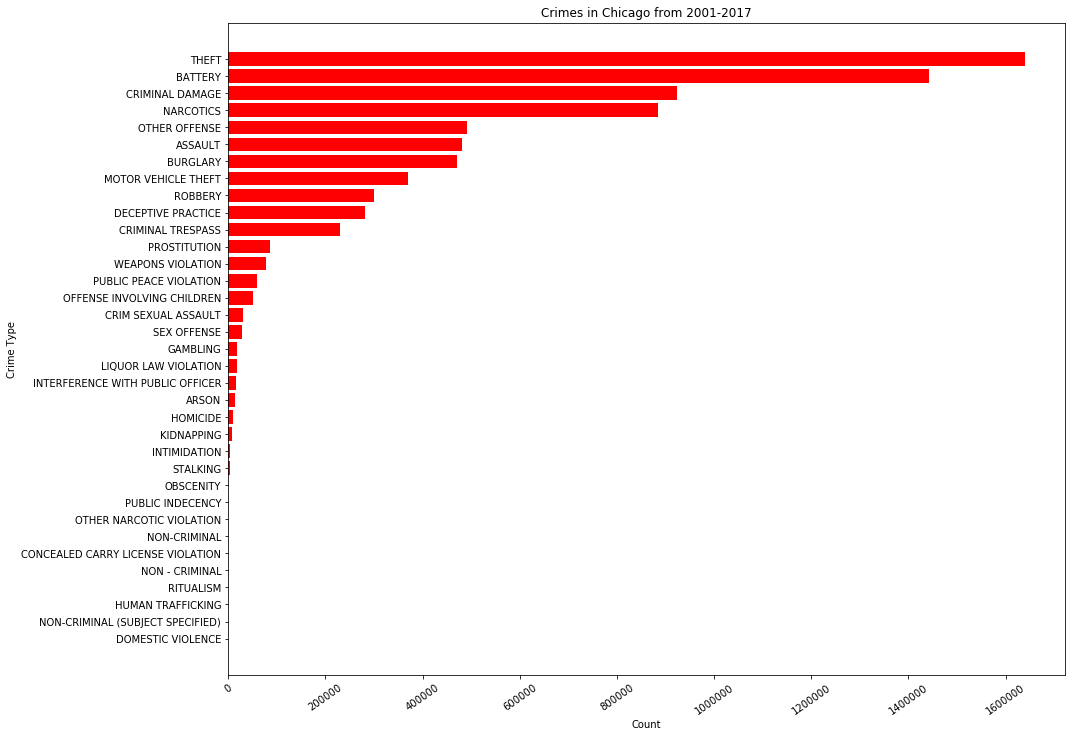

In [12]:
fig1, ax1 = plt.subplots()

crime_type = unzip_crime_data[0]
crime_count = unzip_crime_data[1]
y_pos = np.arange(len(crime_type))

ax1.barh(y_pos, crime_count, align='center', color='red')
ax1.set_yticks(y_pos)

ax1.set_yticklabels(crime_type)
ax1.invert_yaxis()  
ax1.set_xlabel('Count')
ax1.set_ylabel('Crime Type')
ax1.set_title('Crimes in Chicago from 2001-2017')
for cur_tick in ax1.get_xticklabels():
    cur_tick.set_rotation(35)
plt.show()

In [13]:
crime_location_counts = crimes_2001_17['Location Description'].value_counts()
crime_location_counts = crime_location_counts.to_dict()
crime_location_counts = sorted(crime_location_counts.items(), key=lambda x:x[1], reverse=True)
crime_location_counts

[('STREET', 2101842),
 ('RESIDENCE', 1341749),
 ('SIDEWALK', 815595),
 ('APARTMENT', 812512),
 ('OTHER', 294286),
 ('PARKING LOT/GARAGE(NON.RESID.)', 225454),
 ('ALLEY', 180155),
 ('SCHOOL, PUBLIC, BUILDING', 173750),
 ('RESIDENCE-GARAGE', 158550),
 ('RESIDENCE PORCH/HALLWAY', 138492),
 ('SMALL RETAIL STORE', 134003),
 ('VEHICLE NON-COMMERCIAL', 128311),
 ('RESTAURANT', 116295),
 ('GROCERY FOOD STORE', 100812),
 ('DEPARTMENT STORE', 95201),
 ('GAS STATION', 82396),
 ('RESIDENTIAL YARD (FRONT/BACK)', 75442),
 ('CHA PARKING LOT/GROUNDS', 65124),
 ('PARK PROPERTY', 61322),
 ('COMMERCIAL / BUSINESS OFFICE', 58200),
 ('CTA PLATFORM', 44710),
 ('CHA APARTMENT', 41550),
 ('BAR OR TAVERN', 41169),
 ('DRUG STORE', 35671),
 ('SCHOOL, PUBLIC, GROUNDS', 34772),
 ('BANK', 32563),
 ('HOTEL/MOTEL', 31475),
 ('CHA HALLWAY/STAIRWELL/ELEVATOR', 30135),
 ('VACANT LOT/LAND', 28034),
 ('TAVERN/LIQUOR STORE', 26721),
 ('CTA TRAIN', 25855),
 ('CTA BUS', 25158),
 ('DRIVEWAY - RESIDENTIAL', 23519),
 ('HOSPITAL

In [14]:
unzip_crime_location_data = zip(*crime_location_counts)
print(unzip_crime_location_data[0])
print(unzip_crime_location_data[1])

('STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING', 'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE', 'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'GAS STATION', 'RESIDENTIAL YARD (FRONT/BACK)', 'CHA PARKING LOT/GROUNDS', 'PARK PROPERTY', 'COMMERCIAL / BUSINESS OFFICE', 'CTA PLATFORM', 'CHA APARTMENT', 'BAR OR TAVERN', 'DRUG STORE', 'SCHOOL, PUBLIC, GROUNDS', 'BANK', 'HOTEL/MOTEL', 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'VACANT LOT/LAND', 'TAVERN/LIQUOR STORE', 'CTA TRAIN', 'CTA BUS', 'DRIVEWAY - RESIDENTIAL', 'HOSPITAL BUILDING/GROUNDS', 'AIRPORT/AIRCRAFT', 'POLICE FACILITY/VEH PARKING LOT', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'GOVERNMENT BUILDING/PROPERTY', 'CONSTRUCTION SITE', 'CONVENIENCE STORE', 'SCHOOL, PRIVATE, BUILDING', 'NURSING HOME/RETIREMENT HOME', 'ABANDONED BUILDING', 'CURRENCY EXCHANGE', 'CTA GARAGE / OTHER PROPERTY', 'WAREHOUSE', 'BARBERSHOP',

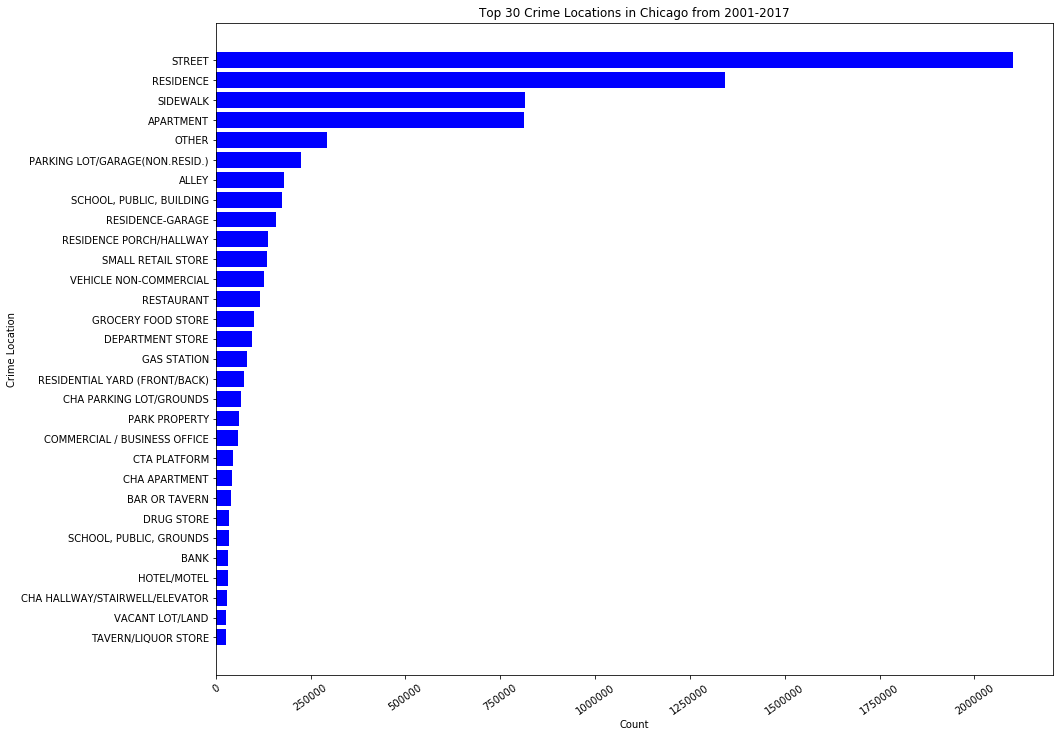

In [17]:
fig2, ax2 = plt.subplots()

crime_location_type = unzip_crime_location_data[0][0:30]
crime_location_count = unzip_crime_location_data[1][0:30]
y_pos_crime_location = np.arange(len(crime_location_type))

ax2.barh(y_pos_crime_location, crime_location_count, align='center', color='blue')
ax2.set_yticks(y_pos_crime_location)

ax2.set_yticklabels(crime_location_type)
ax2.invert_yaxis()  
ax2.set_xlabel('Count')
ax2.set_ylabel('Crime Location')
ax2.set_title('Top 30 Crime Locations in Chicago from 2001-2017')
for cur_tick in ax2.get_xticklabels():
    cur_tick.set_rotation(35)
plt.show()

In [18]:
crimes_2001_17[crimes_2001_17['Primary Type'] == 'THEFT'].Description.value_counts()

$500 AND UNDER                      611161
OVER $500                           412497
FROM BUILDING                       270438
RETAIL THEFT                        188945
FINANCIAL ID THEFT: OVER $300        57810
POCKET-PICKING                       36532
PURSE-SNATCHING                      19868
FINANCIAL ID THEFT:$300 &UNDER       19590
ATTEMPT THEFT                        13243
ATTEMPT FINANCIAL IDENTITY THEFT      4067
AGG: FINANCIAL ID THEFT               3954
FROM COIN-OP MACHINE/DEVICE           1364
DELIVERY CONTAINER THEFT              1001
$300 AND UNDER                          19
OVER $300                               16
THEFT RETAIL                             1
Name: Description, dtype: int64